# Project: Analyze Sales Data

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Task 1.1: Read dataset

In [159]:
df_product = pd.read_csv('C:\Project_DataAnalyst\Project_portfolio\Portfolio of Data Sales Project\data sales\Products.csv')
df_customers = pd.read_csv('C:\Project_DataAnalyst\Project_portfolio\Portfolio of Data Sales Project\data sales\Customers.csv', encoding = 'latin1')

df_2015 = pd.read_csv('C:\Project_DataAnalyst\Project_portfolio\Portfolio of Data Sales Project\data sales\Sales_2015.csv')
df_2016 = pd.read_csv('C:\Project_DataAnalyst\Project_portfolio\Portfolio of Data Sales Project\data sales\Sales_2016.csv')
df_2017 = pd.read_csv('C:\Project_DataAnalyst\Project_portfolio\Portfolio of Data Sales Project\data sales\Sales_2017.csv')

data_sales = pd.concat([df_2015, df_2016, df_2017 ], axis = 0, ignore_index = True)


In [160]:
data_sales.head()
data_sales.to_csv('data_sales.csv', index=True) 

In [161]:
df_customers['CustomerKey'].nunique()

18148

# Task 2: Process data for analysis

# Task 2.1: Create a column named SKU_type1 containing the characters before the first "-".

In [162]:
df_product['SKU_type1'] = df_product['SKU'].str.split('-').str[0]
df_product['SKU_type1'].head()

0    HL
1    HL
2    SO
3    SO
4    HL
Name: SKU_type1, dtype: object

# Task 2.2: Create a column named SKU_type2
- For SKU rows with only 1 "-" character, SKU_type2 receives the string "NA", for SKU rows with more than one "-" then SKU_type2 receives the characters after the last "-".

In [163]:
def excute_string(x):
    if x.count('-') < 2:
        return 'NA'
    else:
        return x.split('-')[-1]
df_product['SKU_type2'] = df_product['SKU'].apply(excute_string)
df_product['SKU_type2'] .head()

0     R
1    NA
2     M
3     L
4     B
Name: SKU_type2, dtype: object

In [164]:
df_customers['CustomerKey'].nunique()

18148

# Task 2.3: Remove the "$" and "," signs in the 'Annual Income' column then convert to "float" format.

In [165]:
df_customers["AnnualIncome"] = df_customers["AnnualIncome"].astype(str)

df_customers["AnnualIncome"] = df_customers["AnnualIncome"].str.replace('[$,]', '', regex=True).astype(float)

df_customers.head()


,CustomerKey,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,MR.,JON,YANG,4/8/1966,M,M,jon24@adventure-works.com,90000.00,2,Bachelors,Professional,Y
1,11001,MR.,EUGENE,HUANG,5/14/1965,S,M,eugene10@adventure-works.com,60000.00,3,Bachelors,Professional,N
2,11002,MR.,RUBEN,TORRES,8/12/1965,M,M,ruben35@adventure-works.com,60000.00,3,Bachelors,Professional,Y
3,11003,MS.,CHRISTY,ZHU,2/15/1968,S,F,christy12@adventure-works.com,70000.00,0,Bachelors,Professional,N
4,11004,MRS.,ELIZABETH,JOHNSON,8/8/1968,S,F,elizabeth5@adventure-works.com,80000.00,5,Bachelors,Professional,Y


# Task 3: Reporting


# Task 3.1: How many product keys (ProductKeys) are not duplicated?

In [166]:
len(df_product["ProductKey"].unique())

293

# Task 3.2: Calculate the GPM (gross profit margin) of each product code

- Gross profit margin (%) = Gross profit / Total revenue
-  Gross profit = Net revenue – Cost of goods sold

In [167]:
df_product['GPM %'] = round( (df_product["Price"] - df_product["Cost"]) / df_product["Price"] * 100 , 2 )

df_product[["ProductKey","Cost","Price","GPM %"]].head()

,ProductKey,Cost,Price,GPM %
0,214,13.09,34.99,62.60
1,215,12.03,33.64,64.25
2,218,3.40,9.50,64.25
3,219,3.40,9.50,64.25
4,220,12.03,33.64,64.25


# Task 3.2: Calculate the Markup ratio (percentage of profit over cost) of each product code

In [168]:
df_product['ratio_markup %'] = round( (df_product["Price"] - df_product["Cost"]) / df_product["Cost"] * 100 , 2 )
df_product[["ProductKey","Cost","Price","GPM %", 'ratio_markup %']].head()


,ProductKey,Cost,Price,GPM %,ratio_markup %
0,214,13.09,34.99,62.60,167.38
1,215,12.03,33.64,64.25,179.72
2,218,3.40,9.50,64.25,179.72
3,219,3.40,9.50,64.25,179.72
4,220,12.03,33.64,64.25,179.72


# Task 3.4: Add column 'Discount Price' for 15% discount price


In [169]:
df_product['Discount'] = round( df_product['Price'] * 0.85 , 2)

df_product[["ProductKey","ProductName","Price","Discount"]].head()

,ProductKey,ProductName,Price,Discount
0,214,"Sport-100 Helmet, Red",34.99,29.74
1,215,"Sport-100 Helmet, Black",33.64,28.60
2,218,"Mountain Bike Socks, M",9.50,8.07
3,219,"Mountain Bike Socks, L",9.50,8.07
4,220,"Sport-100 Helmet, Blue",33.64,28.60


# Task 3.5: Classify customers based on annual income
- From $150,000 or more, level "Very High"
- From $100,000 or more, level "High"
- From $50,000 or more, level "Average"
- Remaining, level “Low”

Combine 3 columns “Prefix”, “FirstName”, “LastName” into column “full_name”


In [170]:
df_customers['Full_name'] = (
df_customers[['Prefix','FirstName','LastName']].astype('str').apply(' '.join, axis = 1))

In [171]:
def classify_income(x):
    if x >= 150000:
        return "Very High"
    elif x >= 100000:
        return "High"
    elif x >= 50000:
        return "Average"
    else:
        return "Low"     

df_customers['IncomeLevel'] = df_customers['AnnualIncome'].apply(classify_income)
df_customers[["CustomerKey","Full_name","BirthDate","AnnualIncome","IncomeLevel"]].head()


,CustomerKey,Full_name,BirthDate,AnnualIncome,IncomeLevel
0,11000,MR. JON YANG,4/8/1966,90000.00,Average
1,11001,MR. EUGENE HUANG,5/14/1965,60000.00,Average
2,11002,MR. RUBEN TORRES,8/12/1965,60000.00,Average
3,11003,MS. CHRISTY ZHU,2/15/1968,70000.00,Average
4,11004,MRS. ELIZABETH JOHNSON,8/8/1968,80000.00,Average


# Visualize Classify customers

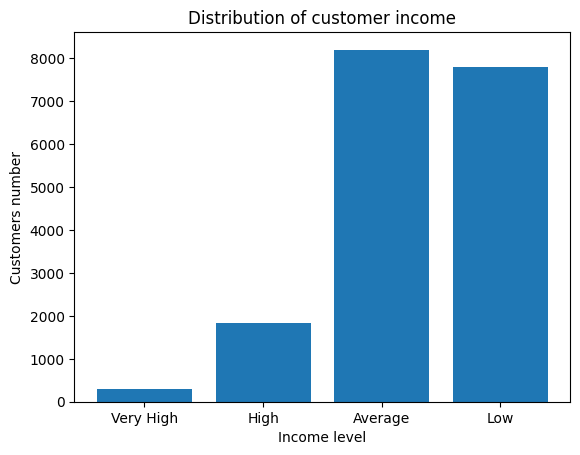

In [172]:
income_counts = df_customers['IncomeLevel'].value_counts()

income_counts = income_counts.reindex(["Very High", "High", "Average", "Low"])

plt.bar(income_counts.index, income_counts.values)

plt.title("Distribution of customer income")
plt.xlabel("Income level")
plt.ylabel("Customers number")

plt.show()


# See customer Education level Distribution

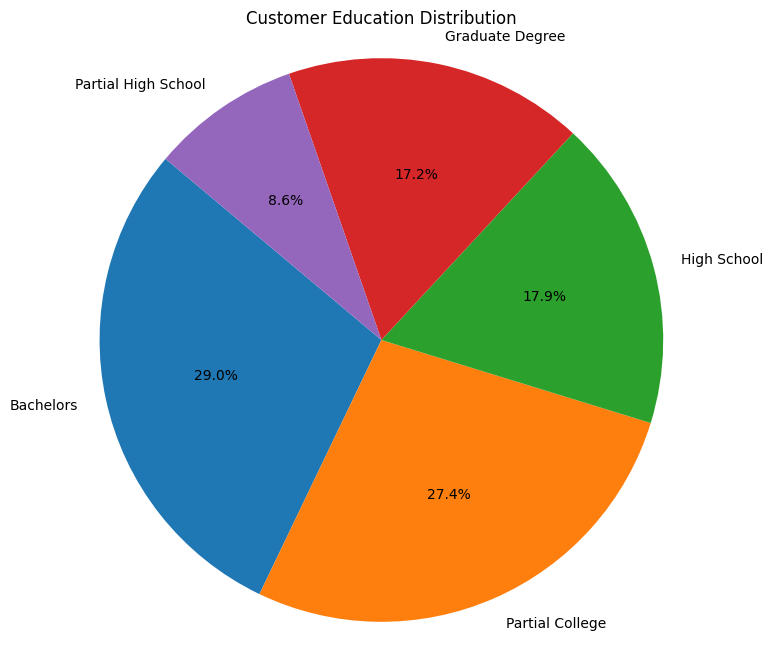

In [173]:
education_counts = df_customers['EducationLevel'].value_counts()
total_customers = len(df_customers)
education_percentages = (education_counts / total_customers) * 100

plt.figure(figsize=(8, 8))
plt.pie(education_percentages, labels=education_percentages.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Customer Education Distribution')
plt.show()


# See customer occupation distribution

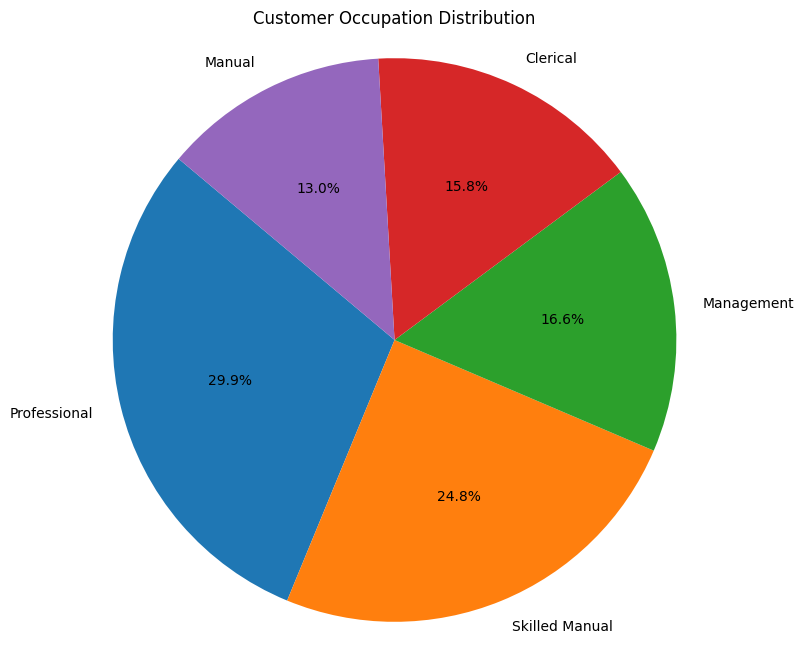

In [174]:
education_counts = df_customers['Occupation'].value_counts()
total_customers = len(df_customers)
education_percentages = (education_counts / total_customers) * 100

plt.figure(figsize=(8, 8))
plt.pie(education_percentages, labels=education_percentages.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Customer Occupation Distribution')
plt.show()

# Task 3.6: Total number of orders in 3 years

In [175]:
data_sales[data_sales["OrderNumber"] == "SO64042"]

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity
32812,2/12/2017,11/7/2003,SO64042,477,11032,9,6,2
32813,2/12/2017,10/16/2003,SO64042,478,11032,9,5,2
32814,2/12/2017,12/14/2003,SO64042,480,11032,9,7,2
32815,2/12/2017,11/9/2003,SO64042,485,11032,9,4,2
32816,2/12/2017,1/17/2004,SO64042,528,11032,9,3,2
32817,2/12/2017,1/15/2004,SO64042,354,11032,9,1,1
32818,2/12/2017,1/26/2004,SO64042,537,11032,9,2,1


- Note: In the same order “SO64042”, customer “11032” purchased 7 types of products (see column ProductKey) and each type of product will have its own purchase quantity (see column OrderQuantity).

In [176]:

total_order = len ( data_sales["OrderNumber"].unique())
print("Total number of orders in 3 years = ",total_order )

Total number of orders in 3 years =  25164


# task 3.7: Which product sells best and how much gross profit comes from that product?  

In [177]:
group_productkey = \
data_sales.groupby('ProductKey').sum()[['OrderQuantity']]
  
group_productkey = \
group_productkey.reset_index().sort_values('OrderQuantity',ascending = False)
  
group_productkey

,ProductKey,OrderQuantity
61,477,7967
64,480,5898
76,528,5678
77,529,4327
3,223,4151
...,...,...
29,348,26
30,349,26
26,345,25
27,346,24


- Best-selling product with code '477'
with sales quantity: '7967'

In [178]:
df_combining = pd.merge(group_productkey, df_product, on = 'ProductKey', how = 'inner')\
[["ProductKey","ProductName","Price","Cost","OrderQuantity"]]

df_combining["Gross profit ($)"] = \
(df_combining["Price"] - df_combining["Cost"]) * df_combining["OrderQuantity"]

df_combining.head()

,ProductKey,ProductName,Price,Cost,OrderQuantity,Gross profit ($)
0,477,Water Bottle - 30 oz.,4.99,1.87,7967,24886.52
1,480,Patch Kit/8 Patches,2.29,0.86,5898,8454.78
2,528,Mountain Tire Tube,4.99,1.87,5678,17736.37
3,529,Road Tire Tube,3.99,1.49,4327,10807.55
4,223,AWC Logo Cap,8.64,5.71,4151,12199.79


# Task 3.8: Shows the correlation between sales volume and gross profit of the 15 best-selling products

C:\Users\quipm\AppData\Local\Temp\ipykernel_11496\1649272200.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x,rotation = 90)


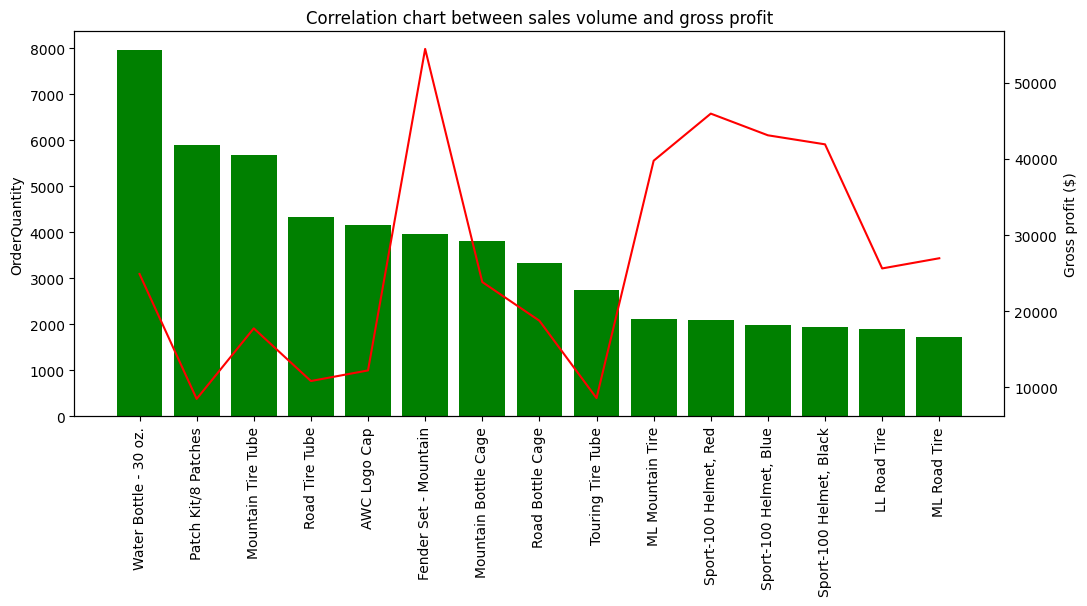

In [179]:
top15_sales = df_combining[:15].copy()
 
x = top15_sales['ProductName']
y1 = top15_sales['OrderQuantity']
y2 = top15_sales['Gross profit ($)']
 
fig, ax1 = plt.subplots(figsize=(12, 5))
ax1.bar(x,y1,color = 'g')
ax1.set_xticklabels(x,rotation = 90)
ax1.set_ylabel('OrderQuantity')  
 
ax2 =ax1.twinx()
ax2.plot(x,y2, 'r-')
ax2.set_ylabel('Gross profit ($)')

plt.title('Correlation chart between sales volume and gross profit')
plt.show()

# Task 3.9: Which month of the year has the highest revenue and how much revenue is that month?

In [180]:
#combining data_sales and df_product using column 'ProductKey', in an inner join
df_tong_hop = pd.merge(data_sales, df_product, on = 'ProductKey' , how = "inner")
 
#filter out from df_tong_hop the necessary columns
df_revenue_month = df_tong_hop[["ProductKey","OrderDate","Price","OrderQuantity"]].copy()
 
# add columns Month
df_revenue_month["OrderDate"] = pd.to_datetime(df_revenue_month["OrderDate"], format = '%m/%d/%Y')
df_revenue_month["Month"] = df_revenue_month["OrderDate"].dt.month

# Add a revenue column: Revenue = Price x OrderQuantity
df_revenue_month["Revenue"] = df_revenue_month["Price"] * df_revenue_month["OrderQuantity"]

df_revenue_month.head() 

,ProductKey,OrderDate,Price,OrderQuantity,Month,Revenue
0,332,2015-01-01,699.10,1,1,699.10
1,332,2015-02-06,699.10,1,2,699.10
2,332,2015-03-03,699.10,1,3,699.10
3,332,2015-03-26,699.10,1,3,699.10
4,332,2015-04-14,699.10,1,4,699.10


In [181]:
pd.set_option('display.float_format', '{:.2f}'.format)

group_month = df_revenue_month.groupby('Month')['Revenue'].sum()

# Reorder the Revenue column in descending order:
sorted_group_month = group_month.sort_values(ascending=False)
print(sorted_group_month)



Month
6    3030800.79
5    2973293.15
4    2676135.18
3    2563994.11
2    2345630.33
1    2292117.05
12   2199070.33
11   1460524.20
10   1434097.65
8    1340646.20
7    1301471.47
9    1296806.37
Name: Revenue, dtype: float64


# Insight:
- The month with the highest revenue is June with revenue = 3030800.79 <=> more than 3 million $ (this is the total revenue in June of 3 years 2015,2016,2017).

- This data is taken from shops that sell sports bikes, mountain bikes and many accompanying accessories such as hats, socks, clothes, etc. There is a large difference in revenue between months => thus reflecting that shopping behavior depends a lot on time.

- The highest revenue is from April to June, and this is also the European summer period (European summer weather is very cool, the sky turns blue, the nights are short, the days are long, the sky is just starting to get dark. around 8:00 p.m. - 9:00 p.m., so there is plenty of time to play outdoors)

> Knowing this insight will greatly help business activities such as preparing goods, focusing on running advertising and promotions at the right time.

# Visualize revenue data by month

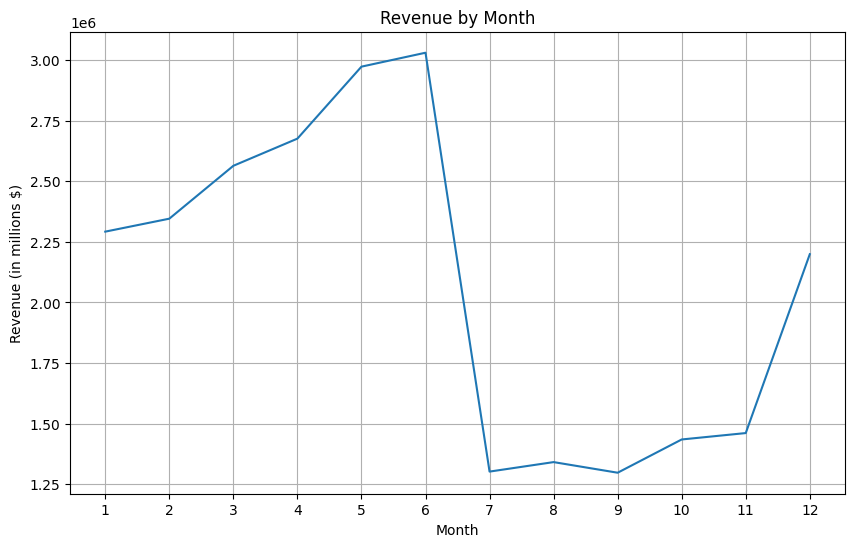

In [182]:
plt.figure(figsize=(10, 6))  
group_month.plot()

plt.xticks(range(1, 13))
plt.xlabel('Month')
plt.ylabel('Revenue (in millions $)')
plt.title('Revenue by Month')

plt.grid(True)  
plt.show()

# Task: Revenue By year

In [183]:
df_tong_hop = pd.merge(data_sales, df_product, on = 'ProductKey' , how = "inner")
 
df_revenue_year = df_tong_hop[["ProductKey","OrderDate","Price","OrderQuantity"]].copy()
df_revenue_year['OrderDate'] = pd.to_datetime(df_revenue_month['OrderDate'], format='%m/%d/%Y')

df_revenue_year['Year'] = df_revenue_month['OrderDate'].dt.year

df_revenue_year['Revenue'] = df_revenue_year['Price'] * df_revenue_year['OrderQuantity']

df_revenue_year = df_revenue_year.groupby('Year')['Revenue'].sum().reset_index()
df_revenue_year.head()

,Year,Revenue
0,2015,6404933.58
1,2016,9324203.79
2,2017,9185449.45


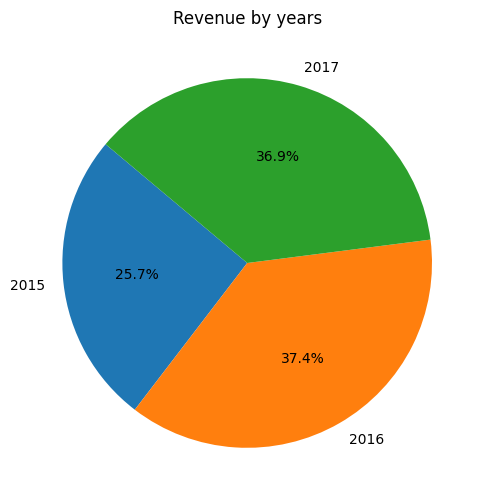

In [184]:
plt.figure(figsize=(6, 6))
plt.pie(df_revenue_year['Revenue'], labels=df_revenue_year['Year'], autopct='%1.1f%%', startangle=140)
plt.title('Revenue by years')
plt.show()

# Task 3.10: Find out those customers who only made one-time purchases and did not return to make purchases in 3 years 2015, 2016, 2017. Then extract their email to send promotion information.

In [185]:
#filter data_sales by only getting rows with 'OrderLineItem' = 1:
df_temp = data_sales[data_sales['OrderLineItem'] == 1]
 
#next groupby and count normally:
df_temp = df_temp.groupby('CustomerKey').count()[['OrderNumber']]
df_temp = df_temp[df_temp['OrderNumber'] == 1]
 
# save the satisfied CustomerKey into a list
list_cus = list(df_temp.index)
 
#look up customer information using list_cus
df_result = df_customers[df_customers['CustomerKey'].isin(list_cus)]
 
# list of customers who only buy once
df_result[["CustomerKey","Full_name","EmailAddress","AnnualIncome","IncomeLevel"]]

,CustomerKey,Full_name,EmailAddress,AnnualIncome,IncomeLevel
12,11013,MR. IAN JENKINS,ian47@adventure-works.com,100000.00,High
14,11015,MS. CHLOE YOUNG,chloe23@adventure-works.com,30000.00,Low
15,11016,MR. WYATT HILL,wyatt32@adventure-works.com,30000.00,Low
19,11020,MR. JORDAN KING,jordan73@adventure-works.com,40000.00,Low
20,11021,MS. DESTINY WILSON,destiny7@adventure-works.com,40000.00,Low
...,...,...,...,...,...
18143,29479,MR. TOMMY TANG,tommy2@adventure-works.com,30000.00,Low
18144,29480,MRS. NINA RAJI,nina21@adventure-works.com,30000.00,Low
18145,29481,MR. IVAN SURI,ivan0@adventure-works.com,30000.00,Low
18146,29482,MR. CLAYTON ZHANG,clayton0@adventure-works.com,30000.00,Low


Once we have information about customers who only buy once and do not return, the company can deploy customer care activities to the right customers to improve the RPR index (Repeat Purchase Rate).

# Task 3.11: Look for products that are often bought together

In [186]:
df_tong_hop = pd.merge(data_sales, df_product, on = 'ProductKey', how = 'inner')[['OrderNumber','ProductName']]

filter_dup = df_tong_hop[df_tong_hop['OrderNumber'].duplicated(keep = False)].copy()
concate_str = lambda x: ', '.join(x)

filter_dup['all_product'] = filter_dup.groupby('OrderNumber')['ProductName'].transform(concate_str)
filter_dup = filter_dup[["OrderNumber","all_product"]].drop_duplicates()
filter_dup['all_product'].value_counts()[:10]

all_product
Water Bottle - 30 oz., Mountain Bottle Cage                  188
Mountain Tire Tube, Patch Kit/8 Patches                      178
LL Road Tire, Patch Kit/8 Patches                            128
Mountain Tire Tube, HL Mountain Tire, Patch Kit/8 Patches    123
Touring Tire Tube, Patch Kit/8 Patches                       123
Road Tire Tube, Patch Kit/8 Patches                          122
Mountain Tire Tube, ML Mountain Tire, Patch Kit/8 Patches    118
Patch Kit/8 Patches, LL Mountain Tire                        116
ML Mountain Tire, Patch Kit/8 Patches                        114
Touring Tire, Touring Tire Tube, Patch Kit/8 Patches         109
Name: count, dtype: int64

In [213]:
df = df_2017.merge(df_product, on='ProductKey', how='left')
df['Revenue'] = df['Price'] * df['OrderQuantity']

df.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,SubcategoryKey,SKU,...,Size,Style,Cost,Price,SKU_type1,SKU_type2,GPM %,ratio_markup %,Discount,Revenue
0,1/1/2017,12/13/2003,SO61285,529,23791,1,2,2,37,TT-R982,...,0,0,1.49,3.99,TT,NA,62.60,167.37,3.39,7.98
1,1/1/2017,9/24/2003,SO61285,214,23791,1,3,1,31,HL-U509-R,...,0,0,13.09,34.99,HL,R,62.60,167.38,29.74,34.99
2,1/1/2017,9/4/2003,SO61285,540,23791,1,1,1,37,TI-R982,...,0,0,12.19,32.60,TI,NA,62.60,167.38,27.71,32.60
3,1/1/2017,9/28/2003,SO61301,529,16747,1,2,2,37,TT-R982,...,0,0,1.49,3.99,TT,NA,62.60,167.37,3.39,7.98
4,1/1/2017,10/21/2003,SO61301,377,16747,1,1,1,2,BK-R89B-52,...,52,U,1320.68,2181.56,BK,52,39.46,65.18,1854.33,2181.56


In [220]:
customer_revenue = df.groupby('CustomerKey')['Revenue'].sum().reset_index()

customer_revenue_sorted = customer_revenue.sort_values(by='Revenue', ascending=False)

top_15_customers = customer_revenue_sorted.head(15)

print(top_15_customers)

      CustomerKey  Revenue
235         11420  6801.96
233         11417  6180.38
242         11429  6135.52
239         11425  6035.00
143         11242  5606.56
142         11241  5022.99
1930        14185  4752.66
2880        15566  4724.45
3096        15846  4704.36
145         11245  4689.55
1841        14031  4682.67
3125        15905  4681.42
1939        14200  4677.57
3928        17221  4676.29
1936        14192  4674.55
